<a href="https://colab.research.google.com/github/IKKIM00/sw_latest_tec/blob/master/%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%EC%9C%B5%ED%95%A9%EC%B5%9C%EC%8B%A0%EA%B8%B0%EC%88%A0_part01_%EC%B5%9C%EC%A2%85%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 분석

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from datetime import datetime

date = pd.date_range("2015-1-1", "2015-12-31")
date = pd.Series(date)

In [0]:
!ls "/content/gdrive/My Drive/mosq.data"

Congress.2015.csv	      Munrae.WaterPump.2015.csv
Daerim.Water.2015.csv	      rainfall.2015.csv
Dansan.MiddleSchool.2015.csv  Salesio.2015.csv
Donga.EcovilleAPT.2015.csv    Shingil.Park.2015.csv
Dooam.ChildrenPark.2015.csv   Sinil.Children.2015.csv
KBS.2015.csv		      temperature.avg.2015.csv
Kim.EyeHospital.2015.csv      YangPyung.EcoPark.2015.csv
Munrae.Park.2015.csv	      YangPyung.SeniorCenter.2015.csv


### 데이터 불러오기

In [0]:
#모기 데이터 불러오기
col_names = ["날짜", "모기 양"]

congress = pd.read_csv("/content/gdrive/My Drive/mosq.data/Congress.2015.csv", sep=',', names=col_names, skipinitialspace=True)
darim_water = pd.read_csv("/content/gdrive/My Drive/mosq.data/Daerim.Water.2015.csv", sep=',', names=col_names, skipinitialspace=True)
dasan_mid_sch = pd.read_csv("/content/gdrive/My Drive/mosq.data/Dansan.MiddleSchool.2015.csv", sep=',', names=col_names, skipinitialspace=True)

In [0]:
#기상 데이터 불러오기
col_names_rf = ["날짜", "강수량"]
col_names_temp = ["날짜", "평균 기온"]

rainfall = pd.read_csv("/content/gdrive/My Drive/mosq.data/rainfall.2015.csv", names=col_names_rf)
temperature = pd.read_csv("/content/gdrive/My Drive/mosq.data/temperature.avg.2015.csv", names=col_names_temp)

### 강수량 데이터

In [0]:
#2015년 강수량 데이터
rf_date = rainfall["날짜"].tolist()
rf_amount = rainfall["강수량"].tolist()

temp = []
count = 0
for d in date:
    count += 1
    Sd = str(d)[:10]
    for i in range(len(rf_date)):
         if Sd == rf_date[i]:
             temp.append(rf_amount[i])
             break
    if len(temp) != count:
        temp.append("NaN")

rainfall_data = pd.DataFrame(temp, index=date, columns=["rainfall"])

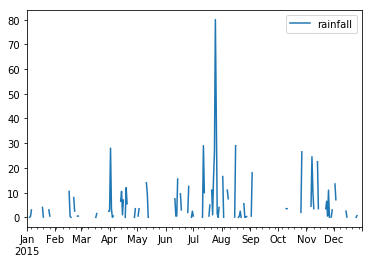

In [0]:
#강수량 그래프
rainfall_data = rainfall_data.astype(float)
rainfall_data.plot()

### 평균기온 데이터

In [0]:
#2015년 평균 기온
temp = []

avg_temp_date = temperature["날짜"].tolist()
avg_temp_amount = temperature["평균 기온"].tolist()

count = 0
for d in date:
    count += 1
    Sd = str(d)[:10]
    for i in range(len(avg_temp_date)):
         if Sd == avg_temp_date[i]:
             temp.append(avg_temp_amount[i])
             break
    if len(temp) != count:
        temp.append("NaN")

temperature_data = pd.DataFrame(temp, index=date, columns=["avg temperature"])

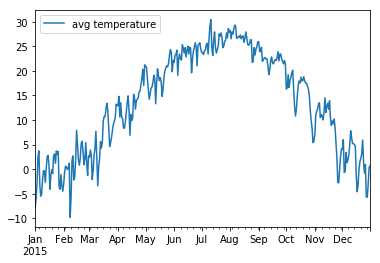

In [0]:
#2015년 평균 기온 그래프
temperature_data = temperature_data.astype(float)
temperature_data.plot()

### 평균기온과 강수량 그래프

Text(0.5, 0, 'date')

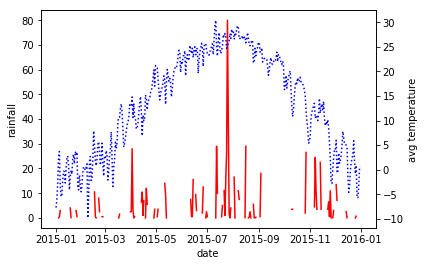

In [0]:
#평균 기온과 강수량을 한번에 볼 수 있는 그래프
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(rainfall_data, 'r-', label="rainfall")
ax0.set_ylabel("rainfall")
ax0.grid(False)
ax1.plot(temperature_data, 'b:', label="avg temperature")
ax1.set_ylabel("avg temperature")
ax1.grid(False)
ax0.set_xlabel("date")

### congress에서 채집된 모기 양을 그래프로 표현

In [0]:
temp = []

congress_date = congress["날짜"].tolist()
congress_amount = congress["모기 양"].tolist()

count = 0
for d in date:
    count += 1
    Sd = str(d)[:10]
    for i in range(len(congress_date)):
         if Sd == congress_date[i]:
             temp.append(congress_amount[i])
             break
    if len(temp) != count:
        temp.append("NaN")

congress_data = pd.DataFrame(temp, index=date, columns=["num of mosq at congress"])

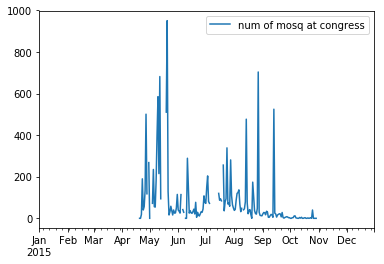

In [0]:
#국회 주변 모기 양 그래프
congress_data = congress_data.astype(float)
congress_data.plot()

### Daerim Water에서 채집된 모기양을 그래프로 표현

In [0]:
temp = []

darim_water_date = darim_water["날짜"].tolist()
darim_water_amount = darim_water["모기 양"].tolist()

count = 0
for d in date:
    count += 1
    Sd = str(d)[:10]
    for i in range(len(darim_water_date)):
         if Sd == darim_water_date[i]:
             temp.append(darim_water_amount[i])
             break
    if len(temp) != count:
        temp.append("NaN")

darim_water_data = pd.DataFrame(temp, index=date, columns=["num of mosq at Daerim Water"])

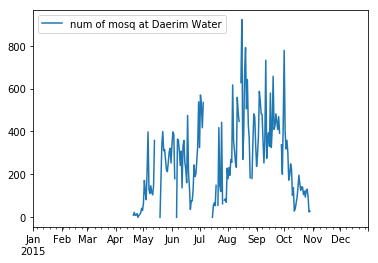

In [0]:
#Daerim Water 주변 모기양 그래프
darim_water_data = darim_water_data.astype(float)
darim_water_data.plot()

### Dasan Middle School에서 채집된 모기양을 그래프로 표현

In [0]:
temp = []

dasan_mid_sch_date = dasan_mid_sch["날짜"].tolist()
dasan_mid_sch_amount = dasan_mid_sch["모기 양"].tolist()

count = 0
for d in date:
    count += 1
    Sd = str(d)[:10]
    for i in range(len(dasan_mid_sch_date)):
         if Sd == dasan_mid_sch_date[i]:
             temp.append(dasan_mid_sch_amount[i])
             break
    if len(temp) != count:
        temp.append("NaN")

dasan_mid_sch_data = pd.DataFrame(temp, index=date, columns=["num of mosq at Dasan Middle School"])

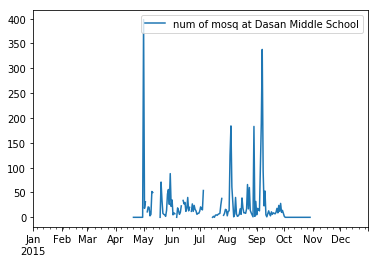

In [0]:
#Dasan Middle School 주변 모기양 그래프
dasan_mid_sch_data = dasan_mid_sch_data.astype(float)
dasan_mid_sch_data.plot()

### 위 세 지역의 모기양 비교 그래프

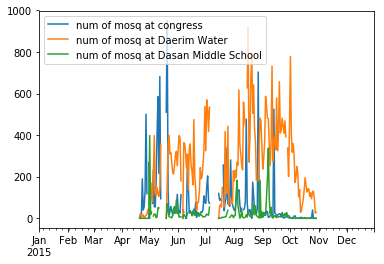

In [0]:
comb = pd.concat([congress_data, darim_water_data, dasan_mid_sch_data], axis=1)

comb.plot()

- 세 지역 모두 공통적으로 드러나는 특징은 모기의 양이 5월부터 나타나기 시작하며 11월까지 나타났다는 점이다
- 즉, 봄부터 등장하기 시작해서 초 겨울까지 모기가 계속해서 잡혔고 시기별로 모기양이 다르게 나타난 점은 지리상 이유일 것이라고 예상한다.
- 국회의 경우, 바로 근처에 한강이 있기 때문에 특정 시기에만 모기 양이 증가하는 것이 아니라 봄부터 초겨울까지 지속적으로 모기가 잡힌 것으로 예상된다
- 대림 유수지도 국회처럼 주변에 도림천이 흐르고 있다는 점에서 모기양이 다산 중학교보다 많이 잡힌 것으로 예상된다
- 즉, 국회와 대림 유수지는 주변에 강이나 천이 흐르기 때문에 모기 양이 평지인 다산 중학교에 비해 많이 잡힌 것으로 보여진다. 하지만 강과 천이라는 점에서 해당 시기의 강수량에 따라서 모기량이 많은 영향을 받았을 것으로 보인다. 강수량의 급증은 한강에 주는 영향보다 대림천에 주는 영향이 더 클 것이라고 생각하기 때문이다.
- 다산 중학교의 경우 상대적으로 근처에 흐르는 물이 없다는 점이 모기 양에 가장큰 영향을 준 것 같다. 뿐만 아니라 주변 지형에서 산도 없다는 점에서 모기가 자라기 쉬원 환경 설립이 어려웠을 것으로 예상한다.


### 기상데이터와 국회 모기양 비교

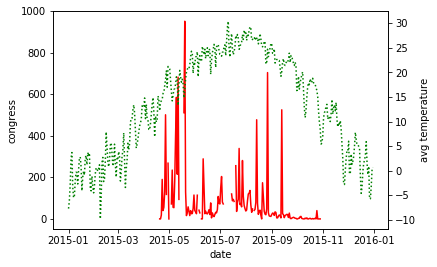

In [0]:
#국회 모기량과 평균기온 그래프

fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(congress_data, 'r-', label=["congress"])
ax0.set_ylabel("congress")
ax0.grid(False)
ax1.plot(temperature_data, "g:", label=["avg temperature"])
ax1.set_ylabel("avg temperature")
ax1.grid(False)
ax0.set_xlabel("date")

plt.show()

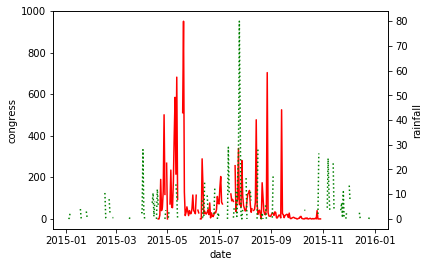

In [0]:
#국회 모기량과 강수량 그래프

fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(congress_data, 'r-', label=["congress"])
ax0.set_ylabel("congress")
ax0.grid(False)
ax1.plot(rainfall_data, "g:", label=["rainfall"])
ax1.set_ylabel("rainfall")
ax1.grid(False)
ax0.set_xlabel("date")

plt.show()

- 모기량이 9월 이후로도 관측은 되지만 거의 미미한 양이라는 점에서 유의미한 측정치는 9월 초반까지라고 할 수 있음
- 온도 그래프를 통해서 알 수 있는 점은 모기량이 폭발적으로 증가한 타이밍부터 비슷한 정도의 양이 관측된 시점까지의 온도가 비슷하다는 것을 알 수 있음
- 오히려 한여름인 6월 말부터 8월 중순까지는 모기량이 적은 경향이 보이고 늦은 봄과 가을에 모기양이 더 많이 관측 되었음
- 강수량과 비교해보면 강수량이 많은 시기보다 강수량이 적은 시기에 모기가 더 많이 채집되는 경향이 보여짐
- 오히려 강수량이 매우 높았던 8월 달 이후로 모기량이 급격하게 감소하는 형태가 보여짐

### 기상데이터와 대림 유수지 모기양 비교

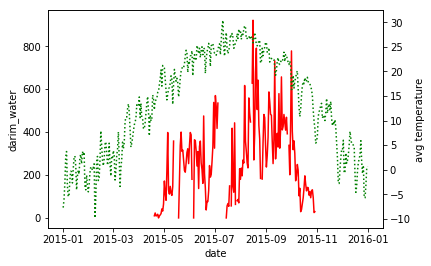

In [0]:
#Darim Water와 평균 기온 비교
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(darim_water_data, 'r-', label=["darim_water"])
ax0.set_ylabel("darim_water")
ax0.grid(False)
ax1.plot(temperature_data, "g:", label=["avg temperature"])
ax1.set_ylabel("avg temperature")
ax1.grid(False)
ax0.set_xlabel("date")
plt.show()

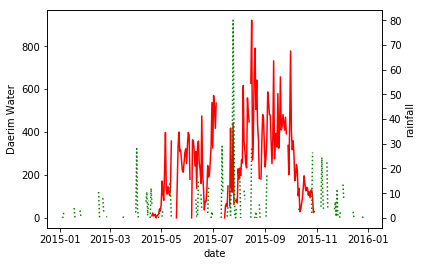

In [0]:
#Darim Water와 강수량 비교
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(darim_water_data, 'r-', label=["Daerim Water"])
ax0.set_ylabel("Daerim Water")
ax0.grid(False)
ax1.plot(rainfall_data, "g:", label=["rainfall"])
ax1.set_ylabel("rainfall")
ax1.grid(False)
ax0.set_xlabel("date")
plt.show()

- 기온 그래프를 통해서 위와 마찬가지로 모기양은 늦은 봄부터 늦은 가을까지 관측되고 있음
- 모기양은 한여름보다 늦은 가을에 더 많이 채집된 경향이 보여짐
- 위의 국회에서 측정된 데이터와 동일하게 강수량이 폭발적으로 증가한 이후에 모기량이 급격하게 감소하였다가 가을이 되면서 강수량이 줄어듦과 동시에 모기량이 급증하는 것을 알 수 있음

### 기상데이터와 다산 중학교 모기양 비교

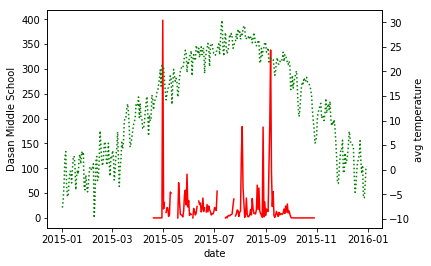

In [0]:
#다산 중학교와 평균 기온 비교
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(dasan_mid_sch_data, 'r-', label=["Dasan Middle School"])
ax0.set_ylabel("Dasan Middle School")
ax0.grid(False)
ax1.plot(temperature_data, "g:", label=["avg temperature"])
ax1.set_ylabel("avg temperature")
ax1.grid(False)
ax0.set_xlabel("date")
plt.show()

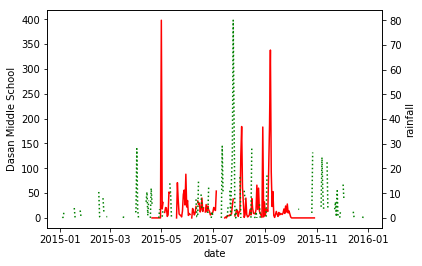

In [0]:
#다산 중학교와 강수량 비교
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(dasan_mid_sch_data, 'r-', label=["Dasan Middle School"])
ax0.set_ylabel("Dasan Middle School")
ax0.grid(False)
ax1.plot(rainfall_data, "g:", label=["rainfall"])
ax1.set_ylabel("rainfall")
ax1.grid(False)
ax0.set_xlabel("date")
plt.show()

- 다산 중학교의 경우 여름 내내 모기량이 위의 두 타지역에 비해서 훨씬 적게 관측되는 모습이 보여짐
- 늦봄에 모기량이 급증하였다가 여름에는 감소하는 추세를 보이고 다시 가을이 되면서 모기량이 늘어나는 향상을 보임
- 타 지역과 유사하게 모기량이 강수량이 적은 시점에 더 많이 채집되는 경향을 보임


# 2. 데이터 전처리

- 전처리를 하지 않는 것은 위에 데이터를 동일하게 사용하면 됨
- 해당 문제의 경우 데이터를 RobustScaler를 사용하였음
- RobustScaler경우 평균과 분산 대신 median과 quartile을 사용하고 이상치에 의해 영향을 받지 않는 특징을 가지고 있음
- 현재 데이터가 모기 데이터와 기상 데이터라는 점과 모기의 양이 기상 데이터에 영향을 많이 받는데 온도 및 계절의 영향을 많이 받는다는 점에서 평균보다는 중간값을 사용하고, 분산대신 사분위계수를 사용하는 것이 더 적절하다고 판단하였음


In [0]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

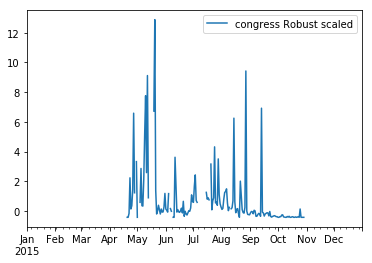

In [0]:
congress_scaled_data = RobustScaler().fit_transform(congress_data)
congress_scaled = pd.DataFrame(congress_scaled_data, index=date, columns=["congress Robust scaled"])
congress_scaled.plot()

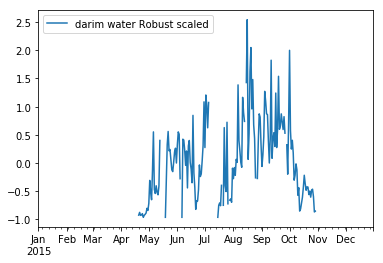

In [0]:
darim_water_scaled_data = RobustScaler().fit_transform(darim_water_data)
darim_water_scaled = pd.DataFrame(darim_water_scaled_data, index=date, columns=["darim water Robust scaled"])
darim_water_scaled.plot()

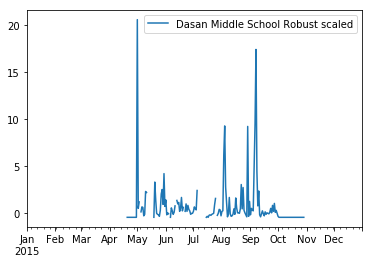

In [0]:
dasan_mid_sch_scaled_data = RobustScaler().fit_transform(dasan_mid_sch_data)
dasan_mid_sch_scaled = pd.DataFrame(dasan_mid_sch_scaled_data, index=date, columns=["Dasan Middle School Robust scaled"])
dasan_mid_sch_scaled.plot()

# 3. 모형 개발 & 결과의 전처리

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### congress 데이터를 이용한 랜덤 포레스트

In [0]:
#congress를 데이터 사용
labels = np.array(date)
data = np.array(congress_data["num of mosq at congress"])

data[np.isnan(data)] = 0

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25, random_state=42)
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_labels, train_data)
predictions = rf.predict(test_labels)

error = abs(predictions - test_data)
r2 = r2_score(test_data, predictions)

print("error(residual): ", round(np.mean(error), 2))
print("Coefficient of determination: ", r2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


error(residual):  46.35
Coefficient of determination:  0.06689186645781453


In [0]:
#congress_scaled를 데이터 사용
labels = np.array(date)
data = np.array(congress_scaled["congress Robust scaled"])

data[np.isnan(data)] =0

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25)
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_labels, train_data)
predictions = rf.predict(test_labels)
error = abs(predictions - test_data)
r2 = r2_score(test_data, predictions)

print("error(residual): ", round(np.mean(error), 2))
print("Coefficient of determination: ", r2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


error(residual):  0.92
Coefficient of determination:  0.20342594794831947




*   첫 번째 결과는 전처리 하지 않은 데이터를 이용한 랜덤포레스트 회귀분석의 결과이고 두 번째 결과는 로버스트 스케일러로 데이터를 전처리 한 후의 회귀분석 결과임
*   두 번째 결과를 보면 이전보다 오차 값이 확연하게 줄어들고 
결정계수의 값이 이전보다 1에 가까워진 점을 알 수 있음
- 즉, 스케일링을 한 결과가 회귀모델의 적합도를 더 높여줬음


### Daerim Water 데이터를 이용한 랜덤포레스트 

In [0]:
#darim_water를 데이터 사용
labels = np.array(date)
data = np.array(darim_water_data["num of mosq at Daerim Water"])
data[np.isnan(data)] =0

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25)
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_labels, train_data)
predictions = rf.predict(test_labels)

error = abs(predictions - test_data)
r2 = r2_score(test_data, predictions)

print("error(residual): ", round(np.mean(error), 2))
print("Coefficient of determination: ", r2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


error(residual):  161.48
Coefficient of determination:  0.8213151614311184


In [0]:
#darim_water_scaled를 데이터 사용
labels = np.array(date)
data = np.array(darim_water_scaled["darim water Robust scaled"])
data[np.isnan(data)] =0

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25)
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_labels, train_data)
predictions = rf.predict(test_labels)

error = abs(predictions - test_data)
r2 = r2_score(test_data, predictions)

print("error(residual): ", round(np.mean(error), 2))
print("Coefficient of determination: ", r2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


error(residual):  0.44
Coefficient of determination:  0.3207492510348645


- 상단의 국회 데이터와 마찬가지로 첫 번째 결과 스케일링을 하기 전의 결과이고 두 번째 결과는 로버스트 스케일러로 스케일링한 이후의 결과임
- 해당 경우, 오차의 값이 확연하게 줄어들긴 하였지만 결정계수 값이 오히려 작아지는 결과가 보여짐
- 즉, 해당 회귀 모델이 적합하지 않았다는 것을 의미함

### Dasan Middle School데이터를 이용한 랜덤 포레스트

In [0]:
#dasan middle school를 데이터 사용
labels = np.array(date)
data = np.array(dasan_mid_sch_data["num of mosq at Dasan Middle School"])
data[np.isnan(data)] =0

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25)
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_labels, train_data)
predictions = rf.predict(test_labels)

error = abs(predictions - test_data)
r2 = r2_score(test_data, predictions)

print("error(residual): ", round(np.mean(error), 2))
print("Coefficient of determination: ", r2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


error(residual):  17.24
Coefficient of determination:  0.05793361090845783


In [0]:
#dasan middle school를 데이터 사용
labels = np.array(date)
data = np.array(dasan_mid_sch_scaled["Dasan Middle School Robust scaled"])
data[np.isnan(data)] =0

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.25)
train_data = train_data.reshape(-1, 1)
train_labels = train_labels.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(train_labels, train_data)
predictions = rf.predict(test_labels)

error = abs(predictions - test_data)
r2 = r2_score(test_data, predictions)

print("error(residual): ", round(np.mean(error), 2))
print("Coefficient of determination: ", r2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


error(residual):  0.67
Coefficient of determination:  0.2365000680529442


- 이번 경우에도 오차는 확연하게 줄어들고 결정계수값도 이전보다 커지는 결과가 보여졌음
- 즉 해당 회귀 모델이 적절하게 학습되고 있음을 의미함